In [1]:
from nltk.stem import WordNetLemmatizer
import nltk

from summarizers import get_book_descriptions
from summarizers import frequent_ngrams
from summarizers import frequent_arbitrarygrams
from summarizers import sentimental_words
from summarizers import squish
from batch_processor import get_reviews_text
from batch_processor import get_summary
from main import print_descriptions

from nltk.sentiment import SentimentIntensityAnalyzer

2022-05-07 00:05:53.477132: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-07 00:05:53.477171: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
FILTER_SPOILERS = True
ASPECTS = ["book", "story", "writing", "plot", "character", "protagonist", "relationship", "dialogue", "action", "pacing"]
SENT_THRESHOLD = 0.6
ENT_COUNT = 20

In [53]:
book_id = "64216"
# harry potter and the sorcerer's stone = 3
# twilight = 41865
# eric = 64218
# guards guards = 64216
# eidolon = 25056040
# the final empire = 68428
# the cruel prince = 26032825
# throne of glass = 7896527

In [54]:
text, title, series = get_reviews_text(book_id, FILTER_SPOILERS, "fantasy_paranormal")

In [55]:
tokenized = nltk.word_tokenize(text)

In [56]:
lemmatizer = WordNetLemmatizer()
lemmatized = [
    lemmatizer.lemmatize(word, pos.lower()[0] if pos.lower()[0] in "nvars" else "n").lower()
    for word, pos in nltk.pos_tag(tokenized)
]

In [57]:
frequent_ngrams(lemmatized, 2)

FreqDist({('terry', 'pratchett'): 78, ('city', 'watch'): 50, ('discworld', 'book'): 47, ('night', 'watch'): 44, ('discworld', 'novel'): 36, ('sam', 'vimes'): 34, ('discworld', 'series'): 30, ('captain', 'vimes'): 26, ('watch', 'book'): 23, ('pratchett', 'book'): 20, ...})

In [58]:
frequent_ngrams(lemmatized, 3)

FreqDist({('terry', 'pratchett', 'book'): 8, ('night', 'watch', 'book'): 7, ('first', 'discworld', 'book'): 7, ('city', 'watch', 'series'): 6, ('city', 'watch', 'book'): 6, ('favorite', 'discworld', 'book'): 6, ('love', 'terry', 'pratchett'): 5, ('favorite', 'discworld', 'character'): 4, ('supreme', 'grand', 'master'): 4, ('first', 'discworld', 'novel'): 3, ...})

In [59]:
frequent_arbitrarygrams(lemmatized, 2, 6, 3)

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.65it/s]


[(('this', 'be', 'my', 'first', 'discworld', 'book'), 4),
 (('i', 'look', 'forward', 'to', 'read', 'more'), 3),
 (('be', 'my', 'first', 'discworld', 'book', 'and'), 3),
 (('book', 'in', 'the', 'discworld', 'series'), 7),
 (('be', 'one', 'of', 'my', 'favorite'), 6),
 (('this', 'be', 'the', 'first', 'discworld'), 4),
 (('terry', 'pratchett', 'discworld', 'novel'), 3),
 (('ankh', 'morpork', 'city', 'watch'), 2),
 (('six', 'foot', 'tall', 'dwarf'), 2),
 (('terry', 'pratchett', 'book'), 9),
 (('night', 'watch', 'book'), 7),
 (('city', 'watch', 'series'), 6),
 (('guards', 'guards'), 70),
 (('sam', 'vimes'), 34),
 (('captain', 'vimes'), 26)]

In [60]:
arbitrarygrams = frequent_arbitrarygrams(lemmatized, 2, 6, 40)

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.95it/s]


In [61]:
sia = SentimentIntensityAnalyzer()
for ambigram, freq in arbitrarygrams:
    if sia.polarity_scores(" ".join(ambigram))["compound"] > 0.6:
        print(ambigram, freq, len(ambigram))

('be', 'a', 'great', 'introduction', 'to') 2 5
('another', 'fun', 'discworld', 'novel') 2 4
('anyway', 'vimes', 'great', 'carrot') 1 4
('vimes', 'great', 'carrot', 'fab') 1 4
('great', 'carrot', 'fab', 'nobby') 1 4
('best', 'one', 'really', 'enjoy') 1 4
('always', 'enjoyable', 'librarian', 'play') 1 4
('enjoyable', 'librarian', 'play', 'major') 1 4
('librarian', 'play', 'major', 'support') 1 4
('play', 'major', 'support', 'role') 1 4
('love', 'terry', 'pratchett') 5 3
('supreme', 'grand', 'master') 4 3
('love', 'guards', 'guards') 2 3
('best', 'terry', 'pratchett') 2 3
('best', 'discworld', 'novel') 2 3
('another', 'great', 'book') 2 3
('favorite', 'discworld', 'novel') 2 3
('great', 'read') 8 2
('great', 'story') 5 2
('great', 'character') 5 2


In [62]:
sentimental_words(lemmatized, 20, 0.5)

[('love', 135, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}),
 ('great', 93, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}),
 ('fun', 69, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}),
 ('laugh', 60, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}),
 ('best', 48, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}),
 ('wonderful', 26, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}),
 ('death', 24, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}),
 ('bad', 22, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}),
 ('kind', 18, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}),
 ('perfect', 18, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}),
 ('hero', 17, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}),
 ('excellent', 13, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}),
 ('brilliant', 12, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}),
 ('stupid', 11, {'neg': 1.0, 

In [63]:
print("chars", len(text))
print("words", len(text.split()))

chars 202330
words 35788


In [64]:
# result = get_book_descriptions(book_id, text, ENT_COUNT, ASPECTS, SENT_THRESHOLD, title, series)
# names_mapping, character_descriptions, aspect_descriptions, sentimental_descriptions, doc = result

In [65]:
result = get_summary(book_id, force_rebuild=False)

names_mapping = result["names_mapping"]
character_descriptions = result["characters"]
aspect_descriptions = result["aspects"]
sentimental_descriptions = result["sentimental"]

In [66]:
names_mapping

{'Pratchett': 'Terry Pratchett',
 'Terry Pratchett': 'Terry Pratchett',
 'Terry': 'Terry Pratchett',
 "Terry Pratchett's": 'Terry Pratchett',
 'Night Watch': 'Night Watch',
 'the Night Watch': 'Night Watch',
 'Ankh Morpork': 'Ankh Morpork',
 'Sybil Ramkin': 'Sybil Ramkin',
 'Sybil': 'Sybil Ramkin',
 'Nigel Planer': 'Nigel Planer',
 'Monty Python': 'Monty Python',
 'Lady Ramkin': 'Lady Ramkin',
 'Lady Sybil': 'Lady Sybil',
 'Sam Vimes': 'Sam Vimes',
 'Vimes': 'Sam Vimes',
 'Vetinari': 'Vetinari',
 'Carrot': 'Carrot',
 'Nobby': 'Nobby',
 'Errol': 'Errol',
 'Mort': 'Mort'}

Sam Vimes 30


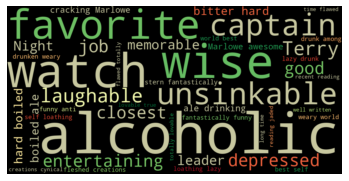

hard boiled ale drinking wise cracking Marlowe
my favorite character in all of Terry's books
memorable character in my recent reading
jaded alcoholic leader of Night Watch

Terry Pratchett 29


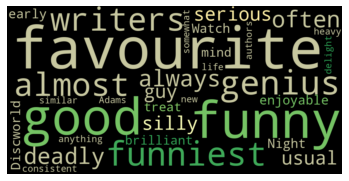

treat for mind after anything heavy in your life
first book of Night Watch series in Discworld
more often than deadly serious about
one of my favourite authors

Carrot 15


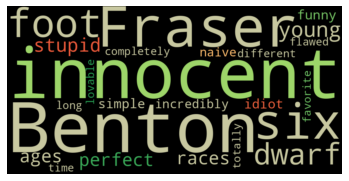

stupid for ages of their races
my favorite characters
completely different

book 229


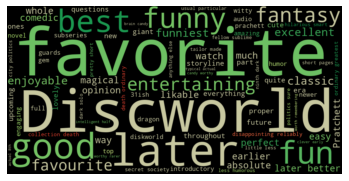

little less humorous than previous Discworld books
my favourite ones of whole Discworld collection
tailor made for everything in books
first part of storyline of watch
my favorite Discworld subseries
about humor than anything else
my favorite Discworld novel

character 109


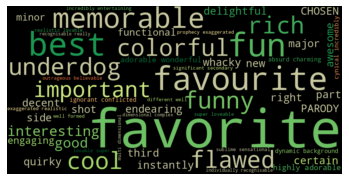

PARODY ON CHOSEN ONE prophecy
individually recognisable
incredibly entertaining
just highly adorable
multi - dimensional
instantly memorable

story 63


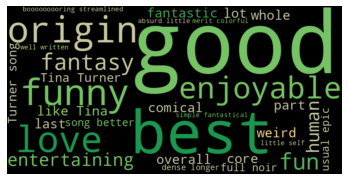

best just like Tina Turner's song
good on its own merit
very well written
very enjoyable
booooooooring

plot 21


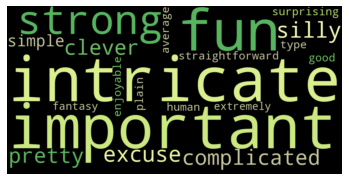

not type of human story
not that important
straightforward
just plain fun



In [67]:
extra_stopwords = {
    "character", "characters", "writer", "author", "one", "first", "second", "last"
    "whole", "book", "books", "series", "man", "woman", "place", "next",
    "able", "read", "reader", "main", "many", "previous", "1st", "2nd", "3rd", "4th", "6th", "7th",
    "protagonist", "girl", "boy", "male", "female", "great", "hero", "heroine",
    "year", "years", "old", "kid", "son"
}

print_descriptions(character_descriptions, min_descs=10, extra_stopwords=extra_stopwords)
print_descriptions(aspect_descriptions, min_descs=10, extra_stopwords=extra_stopwords)

great 82


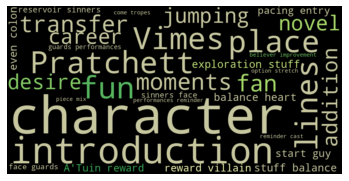

introduction
performances
come tropes
improvement
exploration
characters

best 38


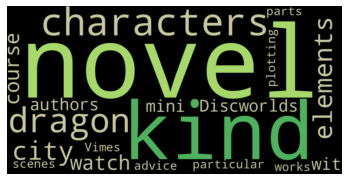

city watch stories
particular one
characters
Discworlds
not story

love 15


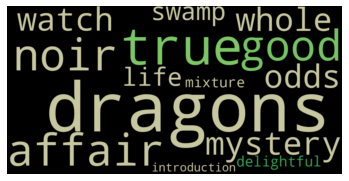

delightful mixture
swamp dragons
introduction



In [68]:
forbidden_sentimentals = {
    "thing", "things", "one", "way", "part", "deal", "job", "first",
    "book", "books", "serie", "series", "story", "stories", "read",
    "literature", "sequel"
}
print_descriptions(sentimental_descriptions, min_descs=10, extra_stopwords=forbidden_sentimentals)

In [69]:
character_desc_count = sum(len(word_descs[1]) for word_descs in character_descriptions.items())
aspect_desc_count = sum(len(word_descs[1]) for word_descs in aspect_descriptions.items())
sentimental_desc_count = sum(len(word_descs[1]) for word_descs in sentimental_descriptions.items())
total = result["sents_count"]

print("characters", character_desc_count)
print("aspects", aspect_desc_count)
print("sentimental", sentimental_desc_count)
print("total", total)
print()

sum_ = character_desc_count + aspect_desc_count + sentimental_desc_count

print("percentage", f"{sum_ / total * 100:.2f} %")

count = 0
unique_descs = 0
word_descs = 0
for descss in [character_descriptions, aspect_descriptions, sentimental_descriptions]:
    for key, descs in descss.items():
        count += len(descs)
        unique_descs += len(set(descs))
        word_descs += sum(len(desc) for desc in descs)

print("count", count)
print("unique_descs", unique_descs)
print("word_descs", word_descs)

print(result["words_count"])

characters 103
aspects 437
sentimental 167
total 2395

percentage 29.52 %
count 707
unique_descs 481
word_descs 5988
42900
